
#**Scenario 1: StockX Shoes Price Prediction**

This dataset is from StockX and was used for their 2019 data competition. 

### **Dataset Description by StockX:**
The data we’re giving you consists of a random sample of all Off-White x Nike and Yeezy 350 sales from between 9-1-2017 (the month that Off-White first debuted “The Ten” collection) and the present. There are 99,956 total sales in the data set; 27,794 Off-White sales, and 72,162 Yeezy sales. The sample consists of U.S. sales only.

To create this sample, we took a random, fixed percentage of StockX sales (X%) for each colorway, on each day, since September 2017. So, for each day the Off-White Jordan 1 was on the market, we randomly selected X% of its sale from each day. (It’s not important to know what X is; all that matters is that it’s a random sample, and that the same fixed X% of sales was selected from every day, for every sneaker).


The dataset contains 8 features:

>Order Date: The date shoes were ordered

> Brand: Brand of the shoe

>Sneaker Name: Name of the sneaker

> Sale Price: Sale Price in dollars

>RetailPrice: Retail Price in dollars

>Release Date: The date that shoe was released

Shoe Size: Size of the shoe

>Buyer State: The U.S. state the shoe was shipped to


###Tasks to be performed:
>1. Lets look at the data, and do some sanity check

>2. Handle data-types

>3. Let us have a look at all the features

>4. Handle Outlier data

>5. Convert datetime data to numerical data

>6. Convert categorical data to numerical data

>7. Split data for training and testing

>8. Create and evaluate those linear models

###Topics Covered:

> Data cleaning

> Data Visualization

> Data Manipulation

> Multiple Linear regression

> Different algos of regression

> Evaluating the model

In [1]:
!wget https://www.dropbox.com/s/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv?dl=0

--2020-09-13 22:55:29--  https://www.dropbox.com/s/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv [following]
--2020-09-13 22:55:30--  https://www.dropbox.com/s/raw/1od9qelthu5834q/StockX-Data-Contest-2019-3.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc633346c13bea326fec55f95856.dl.dropboxusercontent.com/cd/0/inline/A_U9pQ9BIihkoXbK6h57iph_llqXnnagSlWQ_cEx1-z8emsTg2nFSe4yk4DyjkX57dRH9MhkIdQQBCFwES2niYgGFbU7wU6tJKYsF8gddc6TpcY5BtEhSean5TNBEcH1JrM/file# [following]
--2020-09-13 22:55:30--  https://uc633346c13bea326fec55f95856.dl.dropboxusercontent.com/cd/0/inline/A_U9pQ9BIihkoXbK6h57iph_llqXnnagSlWQ_cEx1-z8emsTg2nF

###Task 1: Lets look at the data, and do some sanity check

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/StockX-Data-Contest-2019-3.csv?dl=0')

In [3]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,24-09-2016,11.0,California
1,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,23-11-2016,11.0,California
2,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,23-11-2016,11.0,California
3,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,23-11-2016,11.5,Kentucky
4,01-09-2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,11-02-2017,11.0,Rhode Island


In [4]:
df.shape

(99956, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


>* We can see there are no null values. 

> * The data type of values in column 'Order Date' and 'Release Date' are string objects, so we will need to convert it into type DateTime

> * The data type of values in column 'Sale Price' and 'Retail Price' are also string objects. They should be converted to float, 

>> But the prices contain the dollar sign('\$') and ',' for example '$1,300' so we will need to remove it. 

>> But before we remove it, first check if all the prices are in dollars or not.


###Task 2: Handle Data-types

In [6]:
df['Order Date'] = df['Order Date'].astype('datetime64')
df['Release Date'] = df['Release Date'].astype('datetime64')

In [7]:
#check if all the values starts with $
print(df['Sale Price'][df['Sale Price'].str.startswith('$')].size)
print(df['Retail Price'][df['Retail Price'].str.startswith('$')].size)

99956
99956


Yes all the values start with $. Now remove the dollar signs and ',' for example, \$1,400.50 to 1400.50

In [8]:
import re
df['Sale Price'] = df['Sale Price'].apply(lambda x: float(re.sub(r'[^\d.]','',x)))
df['Retail Price'] = df['Retail Price'].apply(lambda x: float(re.sub(r'[^\d.]','',x)))

In [9]:
#Lets check the manipulated values
df['Sale Price'].head(5)

0    1097.0
1     685.0
2     690.0
3    1075.0
4     828.0
Name: Sale Price, dtype: float64

We can see the prices has been converted to float

###Task 3: Lets have a look at all the features

Lets check the feature 'Brand' 

In [10]:
df.Brand.unique()

array([' Yeezy', 'Off-White'], dtype=object)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


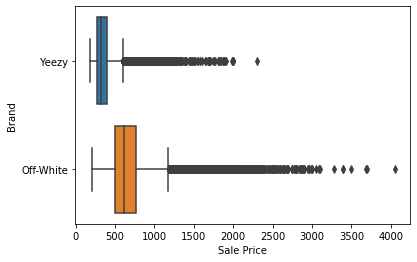

In [11]:
import seaborn as sns
sns.boxplot(df['Sale Price'],df['Brand'])

We can see the Sale Price is generally higher of brand Off-White than Yeezy. 

Lets convert the feature 'Brand' to numerical feature 

In [12]:
d = {' Yeezy':0, 'Off-White':1}
df['Brand'] = df['Brand'].map(d)

Lets check the feature Sneaker Name 

In [13]:
print(df['Sneaker Name'].nunique())

50


In [14]:
print(df['Sneaker Name'].unique())

['Adidas-Yeezy-Boost-350-Low-V2-Beluga'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Green'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017'
 'Adidas-Yeezy-Boost-350-V2-Core-Black-White'
 'Adidas-Yeezy-Boost-350-V2-Cream-White' 'Adidas-Yeezy-Boost-350-V2-Zebra'
 'Adidas-Yeezy-Boost-350-Low-Moonrock' 'Nike-Air-Max-90-Off-White'
 'Nike-Air-Presto-Off-White' 'Nike-Air-VaporMax-Off-White'
 'Air-Jordan-1-Retro-High-Off-White-Chicago' 'Nike-Blazer-Mid-Off-White'
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016'
 'Adidas-Yeezy-Boost-350-Low-Oxford-Tan'
 'Adidas-Yeezy-Boost-350-Low-Turtledove'
 'Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015'
 'Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow'
 'Nike-Air-Force-1-Low-Off-White' 'Nike-Air-Max-97-Off-White'
 'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100'
 'Nike-React-Hyperdunk-2017-Flyknit-Off-White' 'Nike-Zoom-Fly-Off-White'
 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0'

We can see some of the names are in lowercase  and some are in uppercase like Adidas and adidas lets make them all lowercase

In [15]:
 df['Sneaker Name'].apply(lambda x:x.lower()).nunique()

50

In [16]:
x=df[['Sale Price','Sneaker Name']].groupby('Sneaker Name').agg('mean')
x.rename(columns={'Sale Price': 'Average Sale Price'},inplace=True)
x.head(10)

,Average Sale Price
Sneaker Name,
Adidas-Yeezy-Boost-350-Low-Moonrock,996.710000
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,1011.514286
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,895.094737
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,984.237705
Adidas-Yeezy-Boost-350-Low-Turtledove,1531.661765
Adidas-Yeezy-Boost-350-Low-V2-Beluga,788.704819
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,400.439634
Adidas-Yeezy-Boost-350-V2-Blue-Tint,378.986125
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,656.631111


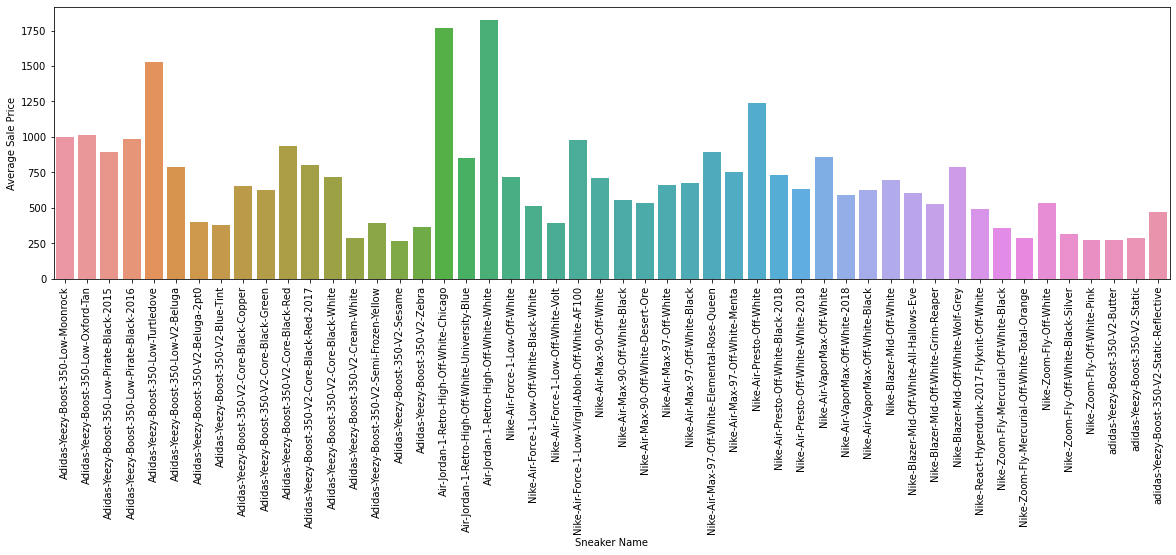

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
my_graph = sns.barplot(x.index , x['Average Sale Price'])
my_graph.set_xticklabels(my_graph.get_xticklabels(), rotation = 90)
print()


We can see that air jordan shoes have high average price

In [18]:
x=df[['Sneaker Name']].groupby('Sneaker Name').agg('count')
x.rename(columns={'Sale Price': ''},inplace=True)
x.head(10)

""
Sneaker Name
Adidas-Yeezy-Boost-350-Low-Moonrock
Adidas-Yeezy-Boost-350-Low-Oxford-Tan
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016
Adidas-Yeezy-Boost-350-Low-Turtledove
Adidas-Yeezy-Boost-350-Low-V2-Beluga
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0
Adidas-Yeezy-Boost-350-V2-Blue-Tint
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper


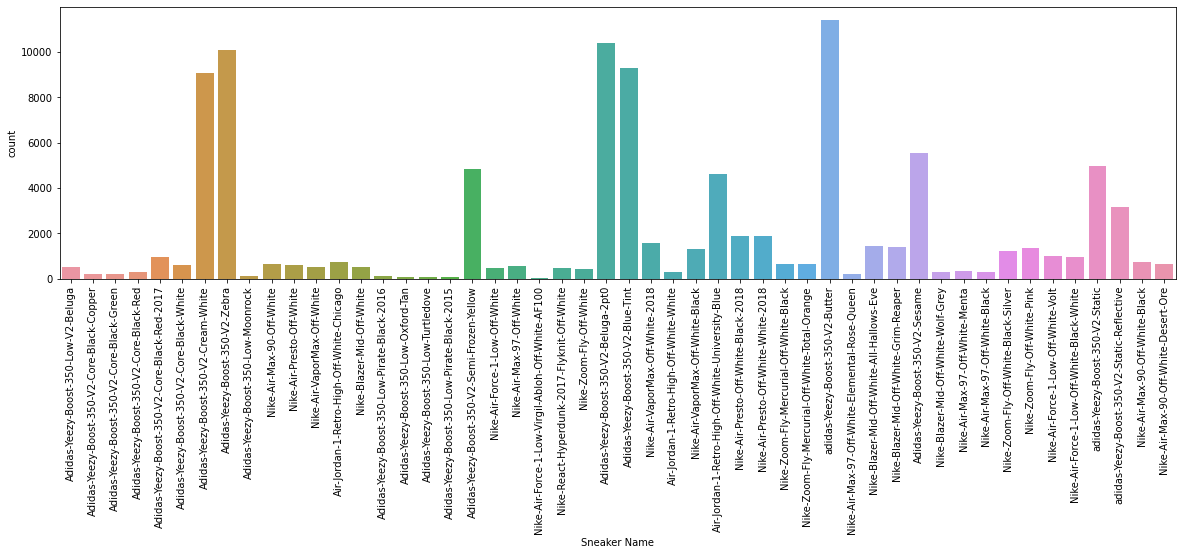

In [19]:
plt.figure(figsize=(20,5))
my_graph = sns.countplot(df['Sneaker Name'])
my_graph.set_xticklabels(my_graph.get_xticklabels(), rotation = 90)
print()

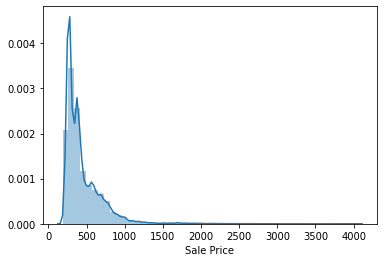

In [20]:
#df['Sale Price']
sns.distplot(df['Sale Price'])

It seems there are outliers. So lets check it

###Task 4: Handle outlier values

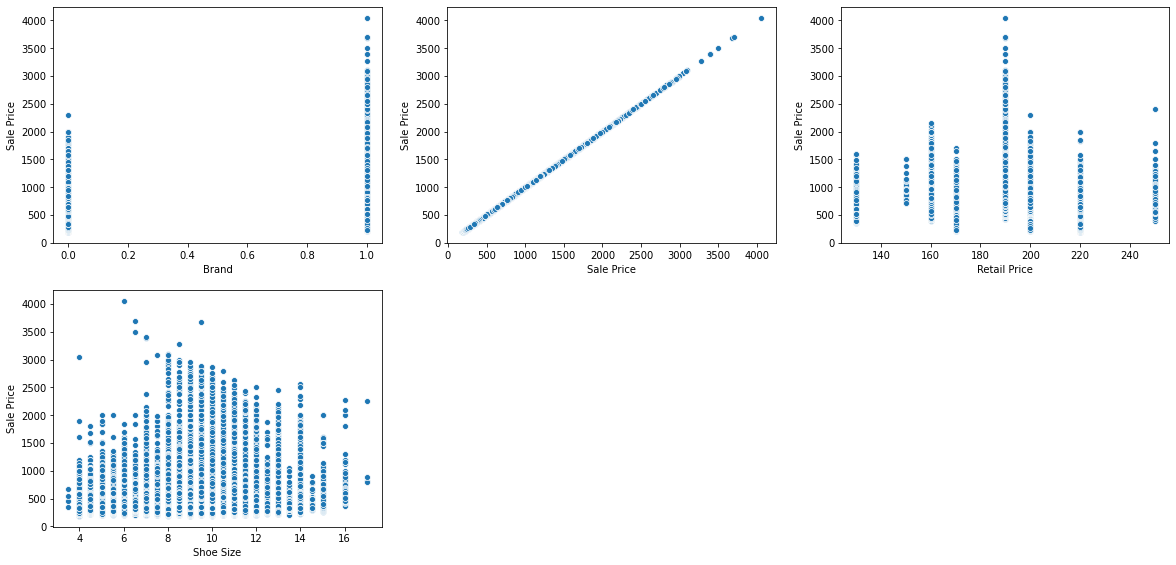

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20,20))
for i,j in enumerate(df.select_dtypes(np.number).columns):
  plt.subplot(len(df.select_dtypes(np.number).columns), 3, i+1)
  #if j!='Sale Price':
  sns.scatterplot(x=df[j],y=df['Sale Price'])

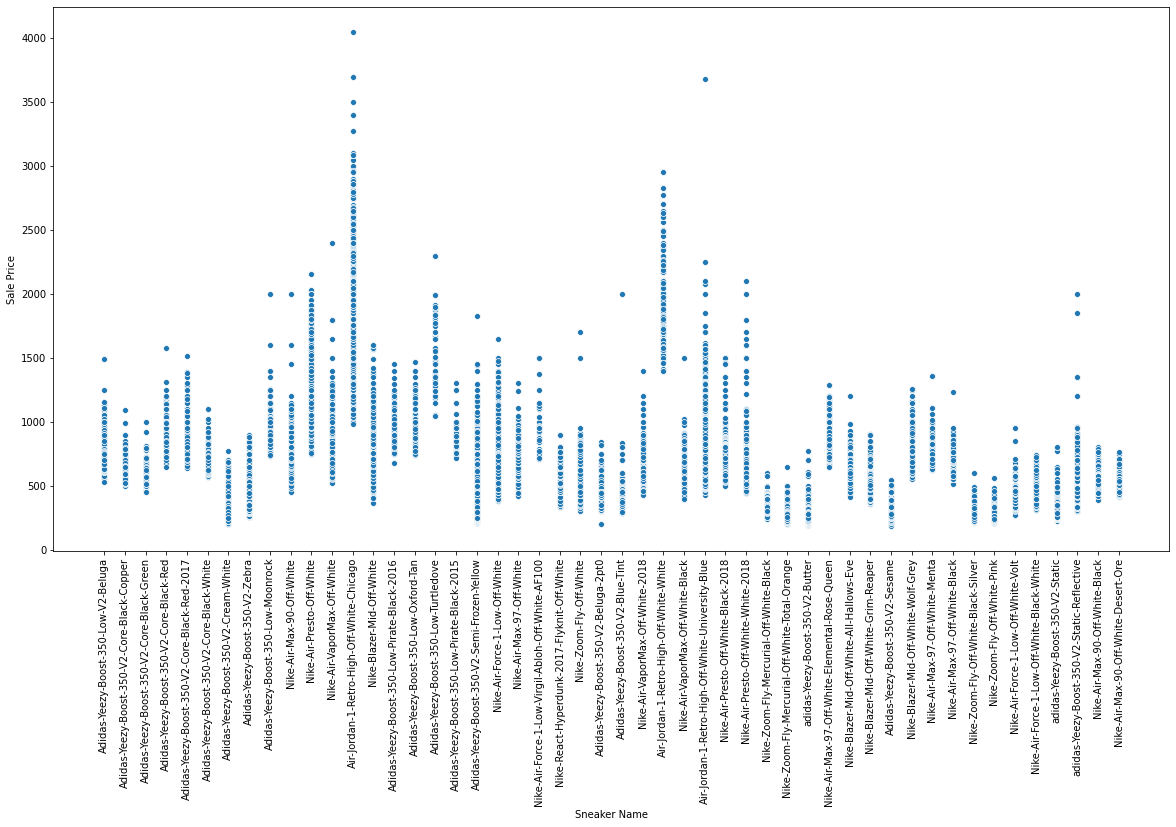

In [22]:
plt.figure(figsize=(20,10))
my_graph = sns.scatterplot(df['Sneaker Name'],df['Sale Price'])
my_graph.set_xticklabels(df['Sneaker Name'].unique(), rotation = 90)
print()

We can see a few shoes like Air Jordan 1 Retro High Off-White-Chicago are the reason for outliers. So lets delete all the intances with Sale Price more than $2500

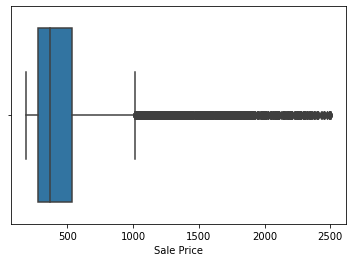

In [23]:
index = df[df['Sale Price']>2500].index
df.drop(index, axis=0,inplace=True)
sns.boxplot(df['Sale Price'], whis=1.8)

In [24]:
df['Retail Price'].unique()

array([220., 200., 160., 250., 190., 130., 170., 150.])

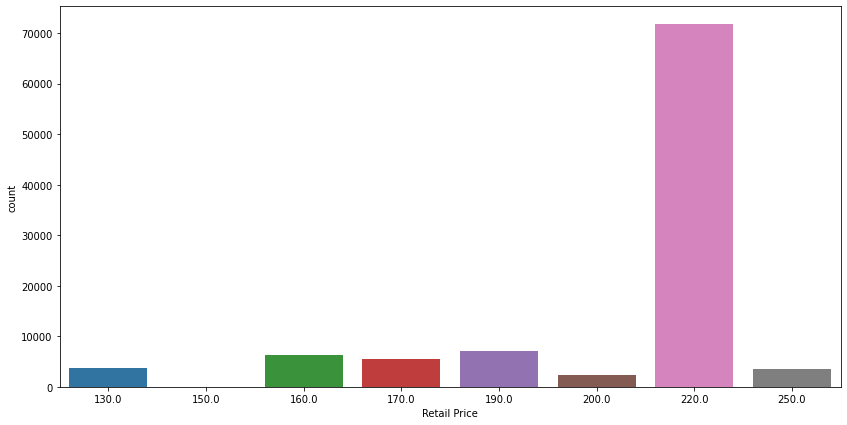

In [25]:
plt.figure(figsize=(14,7))
my_graph = sns.countplot(df['Retail Price'])
my_graph.set_xticklabels(my_graph.get_xticklabels())
print()

We can see the product with Retail Price 220 is sold a lot

In [26]:
df['Shoe Size'].unique()

array([11. , 11.5,  8.5, 10. ,  9. , 14. ,  8. ,  5.5,  9.5, 10.5, 13. ,
       12. ,  5. ,  6.5,  6. ,  7.5, 12.5,  4. ,  7. , 13.5, 16. , 17. ,
       14.5,  4.5, 15. ,  3.5])

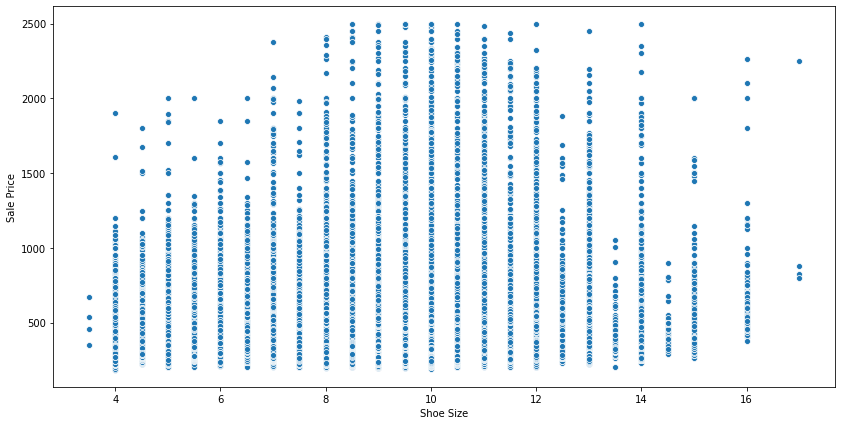

In [27]:
plt.figure(figsize=(14,7))
sns.scatterplot(df['Shoe Size'],df['Sale Price'])

In [28]:
df['Buyer Region'].nunique()

51

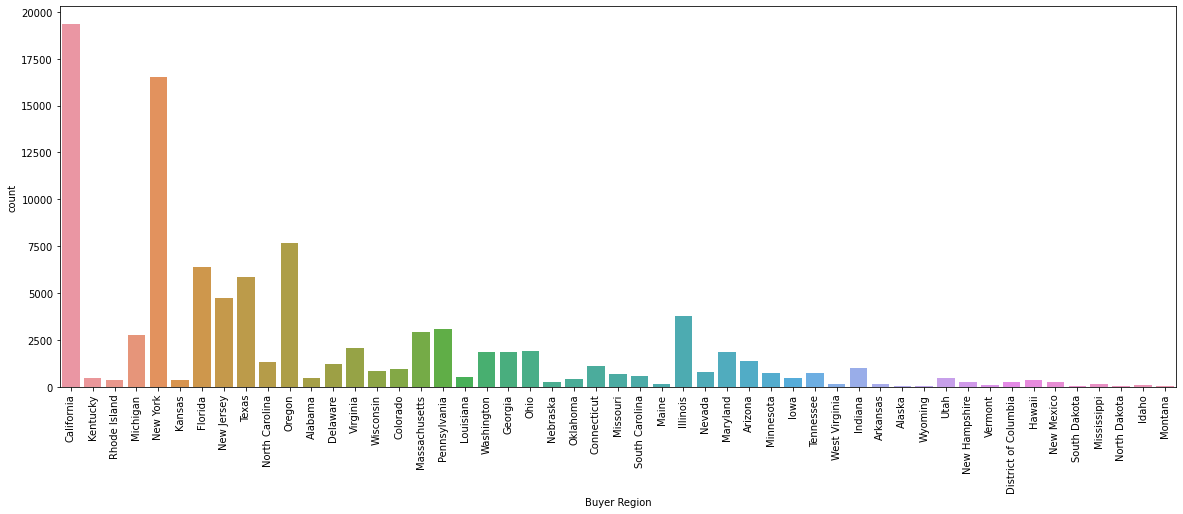

In [29]:
plt.figure(figsize=(20,7))
my_graph = sns.countplot(df['Buyer Region'])
my_graph.set_xticklabels(my_graph.get_xticklabels(),rotation = 90)
print()

###Task 5: Convert the datetime data to numerical data

In [30]:
import datetime
df['Release Date'] = df['Release Date'].map(datetime.date.toordinal) #calculates the days b/w 01/01/01 and the given date
df['Release Date'].head() 

0    736231
1    736291
2    736291
3    736291
4    736635
Name: Release Date, dtype: int64

In [31]:
df['Release Date'].nunique()

35

In [32]:
df['Order Date'] = df['Order Date'].map(datetime.date.toordinal) #calculates the days b/w 01/01/01 and the given date

Now lets save the sale price into a different dataframe, it will be used while checking model performance


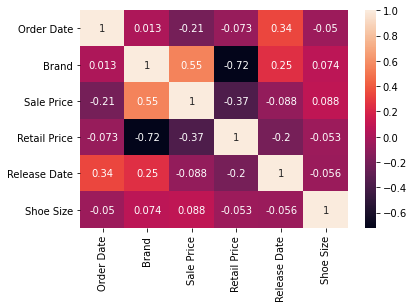

In [33]:
sns.heatmap(df.corr(),annot=True)

You can see the retail price is negatively correlated with Normalise_Sale_Price, but its not True. Let me explain it to you with an example, Suppose,

shoe A is having retail price of 200 and its average sale price is 1200, and

another shoe B has retail price 300 and average Sale Price 600, and

shoe C has Retail Price 250 and average sale price 900.

Now it seems that retail price and sale price are negatively correlated but they are not. *Correlation can be misleading when confounding variables are ignored.* 

It may be the case that shoe A was just released and thats why its price is so high, or shoe B's color is dull and that's why its price is low.

This is called **Simpson's paradox**



Now lets convert the categorical columns to numerical. We have 2 categorical column, one is Sneaker Name and another is Buyer Region
Both are nominal data, so lets one hot encode it

###Task 6: Convert categorical data to numerical data

In [34]:
from sklearn.preprocessing import OneHotEncoder

cols = ['Sneaker Name', 'Buyer Region']

ohe = OneHotEncoder(sparse=False)

encoded = ohe.fit_transform(df[cols])
encoded = pd.DataFrame(encoded)
encoded.index = df.index
encoded.columns = ohe.get_feature_names(cols)


In [35]:
df.drop(cols,inplace=True,axis=1)
encoded = pd.DataFrame(encoded)
df_encoded = pd.concat([df,encoded],axis=1)

df_encoded.head()

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,Sneaker Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Blue-Tint,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Green,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Cream-White,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Sesame,Sneaker Name_Adidas-Yeezy-Boost-350-V2-Zebra,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-University-Blue,Sneaker Name_Air-Jordan-1-Retro-High-Off-White-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Black-White,Sneaker Name_Nike-Air-Force-1-Low-Off-White-Volt,Sneaker Name_Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100,Sneaker Name_Nike-Air-Max-90-Off-White,Sneaker Name_Nike-Air-Max-90-Off-White-Black,Sneaker Name_Nike-Air-Max-90-Off-White-Desert-Ore,Sneaker Name_Nike-Air-Max-97-Off-White,Sneaker Name_Nike-Air-Max-97-Off-White-Black,Sneaker Name_Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,Sneaker Name_Nike-Air-Max-97-Off-White-Menta,Sneaker Name_Nike-Air-Presto-Off-White,Sneaker Name_Nike-Air-Presto-Off-White-Black-2018,Sneaker Name_Nike-Air-Presto-Off-White-White-2018,...,Buyer Region_Hawaii,Buyer Region_Idaho,Buyer Region_Illinois,Buyer Region_Indiana,Buyer Region_Iowa,Buyer Region_Kansas,Buyer Region_Kentucky,Buyer Region_Louisiana,Buyer Region_Maine,Buyer Region_Maryland,Buyer Region_Massachusetts,Buyer Region_Michigan,Buyer Region_Minnesota,Buyer Region_Mississippi,Buyer Region_Missouri,Buyer Region_Montana,Buyer Region_Nebraska,Buyer Region_Nevada,Buyer Region_New Hampshire,Buyer Region_New Jersey,Buyer Region_New Mexico,Buyer Region_New York,Buyer Region_North Carolina,Buyer Region_North Dakota,Buyer Region_Ohio,Buyer Region_Oklahoma,Buyer Region_Oregon,Buyer Region_Pennsylvania,Buyer Region_Rhode Island,Buyer Region_South Carolina,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
0,736338,0,1097.0,220.0,736231,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,736338,0,685.0,220.0,736291,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,736338,0,690.0,220.0,736291,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,736338,0,1075.0,220.0,736291,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

###Task 7: Split the data for training and testing

Lets split the data for training and testing

In [56]:
from sklearn.model_selection import train_test_split
X=df_encoded.drop('Sale Price',axis=1) #Normalised_
y=df_encoded['Sale Price']
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=.20,random_state=7)
X_train.shape, Y_train.shape, x_test.shape, y_test.shape

((79900, 106), (79900,), (19976, 106), (19976,))

In [57]:
def plot_pred(y_train,y_train_pred,y_test_pred,y_test):
  sns.scatterplot(y_train_pred,y_train)
  sns.scatterplot(y_test_pred,y_test)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

###Task 8: Create different different linear models. Evaluate those models

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
lr = make_pipeline(RobustScaler(),LinearRegression())
lr.fit(X_train, Y_train)

Y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error
print('Root mean Squared error on training set:',np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print('Root mean squared error on testing set:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Root mean Squared error on training set: 100.5431695786109
Root mean squared error on testing set: 98.27663598277253


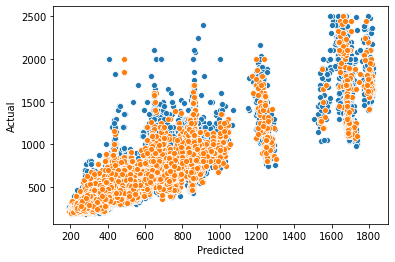

In [60]:
plot_pred(Y_train,Y_train_pred,y_test_pred,y_test)

We can use regularization to filter-out noise and prevent the model from over-fitting. Regularization adds additional information(bias) to penalize extreme parameter weights.

Ridge uses L2 penalized model where we take squared sum of weights and add it to the cost function 

In [61]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
ridge = RidgeCV()
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha 1st iteration :", alpha)
# to gain more accuracy, lets find a better value for alpha 
ridge = RidgeCV(alphas = alpha*np.arange(0.5,1.6,0.05))
ridge.fit(X_train, Y_train)
alpha = ridge.alpha_
print("Best alpha 2nd iteration:", alpha)
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(x_test)

Best alpha 1st iteration : 0.1
Best alpha 2nd iteration: 0.1550000000000001


In [62]:
print('Root mean Squared error on training set:',np.sqrt(mean_squared_error(Y_train,y_pred_ridge_train)))
print('Root mean squared error on testing set:',np.sqrt(mean_squared_error(y_test,y_pred_ridge_test)))

Root mean Squared error on training set: 100.5431821534883
Root mean squared error on testing set: 98.2729822599246


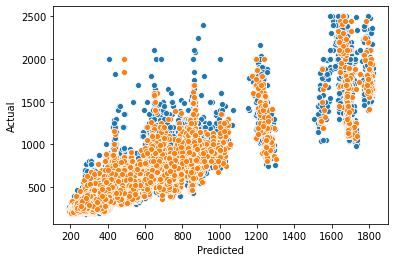

In [63]:
plot_pred(Y_train,y_pred_ridge_train,y_pred_ridge_test,y_test)

Ridge picked 106 features and eliminated the other 0 features


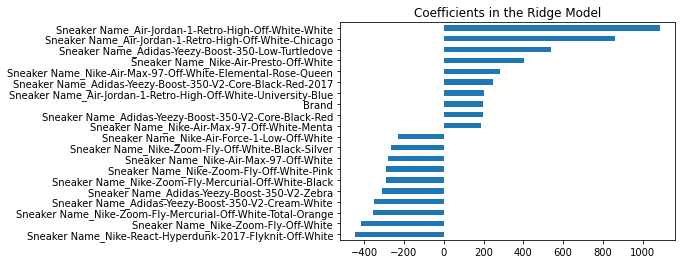

In [64]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Lasso uses L1 penalised model, it is useful when we have lots of features. In this we calculate sum of weights and add it to the cost function

In [65]:
lasso = LassoCV()
lasso.fit(X_train, Y_train)
alpha = lasso.alpha_
print("Best alpha 1st iteration :", alpha)
# to gain more accuracy, lets find a better value for alpha 
lasso = LassoCV(alphas = alpha*np.arange(0.5,1.6,0.1))
lasso.fit(X_train, Y_train)
alpha = lasso.alpha_
print("Best alpha 2nd iteration:", alpha)
lasso = LassoCV(alphas = alpha*np.arange(0.5,1.6,0.1))
lasso.fit(X_train, Y_train)
alpha = lasso.alpha_
print("Best alpha 3rd iteration:", alpha)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(x_test)

Best alpha 1st iteration : 9.297970633160036
Best alpha 2nd iteration: 4.648985316580018
Best alpha 3rd iteration: 2.324492658290009


In [66]:
print('Root mean Squared error on training set:',np.sqrt(mean_squared_error(Y_train,y_pred_lasso_train)))
print('Root mean squared error on testing set:',np.sqrt(mean_squared_error(y_test,y_pred_lasso_test)))

Root mean Squared error on training set: 143.6757726887885
Root mean squared error on testing set: 138.08349110085555


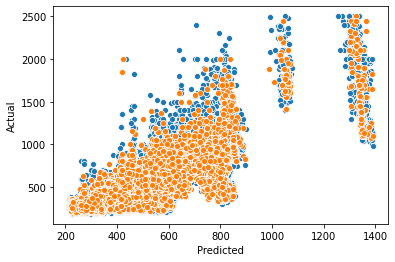

In [67]:
plot_pred(Y_train,y_pred_lasso_train,y_pred_lasso_test,y_test)

Lasso picked 19 features and eliminated the other 87 features


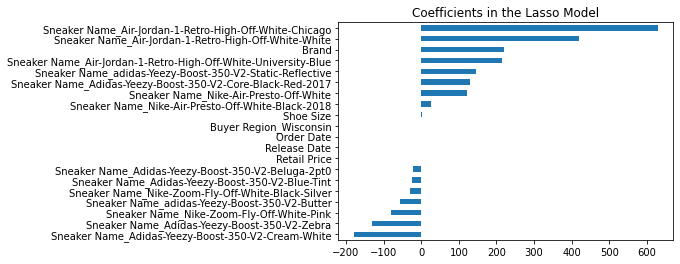

In [68]:
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [51]:
elastic = ElasticNetCV()
elastic.fit(X_train, Y_train)
alpha = elastic.alpha_
print("Best alpha 1st iteration :", alpha)
# to gain more accuracy, lets find a better value for alpha 
elastic = ElasticNetCV(alphas = alpha*np.arange(0.5,1.6,0.05))
elastic.fit(X_train, Y_train)
alpha = elastic.alpha_
print("Best alpha 2nd iteration:", alpha)

y_pred_elastic_train = lasso.predict(X_train)
y_pred_elastic_test = lasso.predict(x_test)

Best alpha 1st iteration : 18.59594126632007
Best alpha 2nd iteration: 9.297970633160036


In [52]:
print('Root mean Squared error on training set:',np.sqrt(mean_squared_error(Y_train,y_pred_elastic_train)))
print('Root mean squared error on testing set:',np.sqrt(mean_squared_error(y_test,y_pred_elastic_test)))

Root mean Squared error on training set: 143.6757726887885
Root mean squared error on testing set: 138.08349110085555


Final Prediction and root mean squared error with actual prices

In [53]:
#converting the Normalized Sale Price to Sale Price
#real_pred = np.expm1(y_test_pred) #exp1m calculates exp(x)-1
ind = y_test.index
print('Root mean squared error on testing set:',np.sqrt(mean_squared_error(y[ind],y_test_pred)))

Root mean squared error on testing set: 98.27663598277253


Other error metrics

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R-square score on testing set:',r2_score(y[ind],y_test_pred))
print('mean absolute error on testing set:',mean_absolute_error(y[ind],y_test_pred))

R-square score on testing set: 0.8351456483916627
mean absolute error on testing set: 60.276930546636436
